In [92]:
import numpy as np
import matplotlib as plt

## Optimizer Compare

In [93]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= lr*grads[key]

In [94]:
class Momentum:
    def __init__(self, lr=0.01, momemtum=0.9):
        self.lr= lr
        self.momemtum= momentum
        self.v = None
    def update(self, params, grads):
        if(self.v is None):
            self.v = {}
            for key, value in params.items():
                self.v[key] = np.zeros_like(val)
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [95]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [96]:
grad = np.array([[1,2,3],[4,5,6]])
h = grad * grad
print(h)

[[ 1  4  9]
 [16 25 36]]


## Optimizer compare with mnist

In [97]:
# coding: utf-8
import os
import sys
sys.path.append("../DLFS_book/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


===========iteration:0===========
SGD:2.3615394356053656
Momentum:2.3240647999028603
AdaGrad:2.1604860664834264
Adam:2.238878248277156
===========iteration:100===========
SGD:1.7291073534923949
Momentum:0.357852146568232
AdaGrad:0.1605078973764426
Adam:0.3070705763607061
===========iteration:200===========
SGD:0.7426556717974102
Momentum:0.20570598754319264
AdaGrad:0.10818129378862185
Adam:0.18070687372529637
===========iteration:300===========
SGD:0.6151871507039129
Momentum:0.2871929957245898
AdaGrad:0.0954832087930755
Adam:0.19685324608608473
===========iteration:400===========
SGD:0.3949075884692738
Momentum:0.1763463452010891
AdaGrad:0.0585917213875697
Adam:0.11253620622407388
===========iteration:500===========
SGD:0.41697209144677844
Momentum:0.15666533430937366
AdaGrad:0.055040883523051976
Adam:0.10033441310839918
===========iteration:600===========
SGD:0.4501169896904442
Momentum:0.2270520811817302
AdaGrad:0.16365834668820778
Adam:0.1882170526553744
===========iteration:700===

KeyboardInterrupt: 

## Initialization of Weights

In [98]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def ReLU(x):
    return np.maximum(0, x)
def tanh(x):
    return np.tanh(x)

In [114]:
x = np.random.randn(1000, 100)  
node_num = 100 
hidden_layer_size = 5  
activations = {} 

In [115]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1] #앞에 값 가져옴
        
    #w = np.random.randn(node_num, node_num) * 1 #initialization of weights
    #w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    #w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    
    a = np.dot(x, w)
    #z = sigmoid(a)
    #z = ReLU(a)
    z = tanh(a)
    activations[i] = z

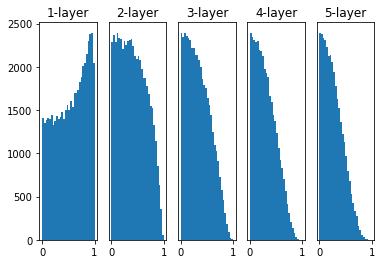

In [116]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: 
        plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## Mnist를 통한 가중치 초기값 비교. 

In [ ]:
import os
import sys

sys.path.append("../DLFS_book")  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

===========iteration:0===========
std=0.01:2.302530453463654
Xavier:2.3088472811735166
He:2.2842277128471657
===========iteration:100===========
std=0.01:2.3026371917095565
Xavier:2.259866721497875
He:1.1660547548745979
===========iteration:200===========
std=0.01:2.3010860934810395
Xavier:2.164747734496924
He:0.6556760639292576
===========iteration:300===========
std=0.01:2.3020760376312515
Xavier:2.000976741283588
He:0.4333420152655256
===========iteration:400===========
std=0.01:2.301193379555836
Xavier:1.6488760599279892
He:0.34588544094482243
===========iteration:500===========
std=0.01:2.300975868635194
Xavier:1.1381407920551192
He:0.4292852428464128
===========iteration:600===========
std=0.01:2.303629335544084
Xavier:0.9135253664260321
He:0.32545807791697146
===========iteration:700===========
std=0.01:2.3008930963960434
Xavier:0.7744116798282518
He:0.3340888406130517
===========iteration:800===========
std=0.01:2.300471007694949
Xavier:0.4962013298239445
He:0.23363976233951106

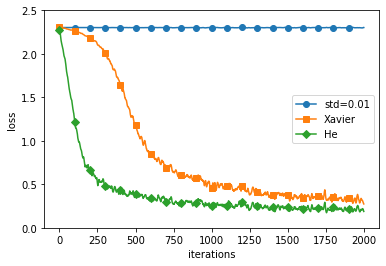

In [110]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []
    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


## Batch Normalization

============== 1/16 ==============
epoch:0 | 0.097 - 0.108
epoch:1 | 0.097 - 0.11
epoch:2 | 0.097 - 0.118
epoch:3 | 0.097 - 0.117
epoch:4 | 0.097 - 0.133
epoch:5 | 0.097 - 0.156
epoch:6 | 0.097 - 0.166
epoch:7 | 0.097 - 0.178
epoch:8 | 0.097 - 0.212
epoch:9 | 0.097 - 0.24
epoch:10 | 0.097 - 0.253
epoch:11 | 0.097 - 0.277
epoch:12 | 0.097 - 0.312
epoch:13 | 0.097 - 0.315
epoch:14 | 0.097 - 0.344
epoch:15 | 0.097 - 0.357
epoch:16 | 0.097 - 0.371
epoch:17 | 0.097 - 0.391
epoch:18 | 0.097 - 0.401
epoch:19 | 0.097 - 0.42


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/dongho/DLFS1/week4/../DLFS_book/common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


============== 2/16 ==============
epoch:0 | 0.117 - 0.123
epoch:1 | 0.097 - 0.117
epoch:2 | 0.097 - 0.094
epoch:3 | 0.097 - 0.123
epoch:4 | 0.097 - 0.154
epoch:5 | 0.097 - 0.167
epoch:6 | 0.097 - 0.19
epoch:7 | 0.097 - 0.216
epoch:8 | 0.097 - 0.236
epoch:9 | 0.097 - 0.257
epoch:10 | 0.097 - 0.263
epoch:11 | 0.097 - 0.296
epoch:12 | 0.097 - 0.312
epoch:13 | 0.097 - 0.32
epoch:14 | 0.097 - 0.347
epoch:15 | 0.097 - 0.367
epoch:16 | 0.097 - 0.393
epoch:17 | 0.097 - 0.42


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.097 - 0.444
epoch:19 | 0.097 - 0.458
============== 3/16 ==============
epoch:0 | 0.167 - 0.087
epoch:1 | 0.406 - 0.106
epoch:2 | 0.52 - 0.158
epoch:3 | 0.58 - 0.217
epoch:4 | 0.666 - 0.258
epoch:5 | 0.704 - 0.299
epoch:6 | 0.752 - 0.341
epoch:7 | 0.777 - 0.382
epoch:8 | 0.814 - 0.416
epoch:9 | 0.824 - 0.447
epoch:10 | 0.877 - 0.472
epoch:11 | 0.9 - 0.511
epoch:12 | 0.921 - 0.528
epoch:13 | 0.934 - 0.545
epoch:14 | 0.921 - 0.56
epoch:15 | 0.95 - 0.588
epoch:16 | 0.958 - 0.606
epoch:17 | 0.962 - 0.631
epoch:18 | 0.971 - 0.647


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.97 - 0.658
============== 4/16 ==============
epoch:0 | 0.132 - 0.088
epoch:1 | 0.316 - 0.107
epoch:2 | 0.426 - 0.157
epoch:3 | 0.539 - 0.263
epoch:4 | 0.611 - 0.342
epoch:5 | 0.656 - 0.426
epoch:6 | 0.678 - 0.474
epoch:7 | 0.729 - 0.527
epoch:8 | 0.75 - 0.553
epoch:9 | 0.779 - 0.594
epoch:10 | 0.789 - 0.615
epoch:11 | 0.805 - 0.646
epoch:12 | 0.82 - 0.669
epoch:13 | 0.829 - 0.684
epoch:14 | 0.846 - 0.708
epoch:15 | 0.853 - 0.717
epoch:16 | 0.86 - 0.747
epoch:17 | 0.873 - 0.752
epoch:18 | 0.875 - 0.763
epoch:19 | 0.888 - 0.78


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 5/16 ==============
epoch:0 | 0.099 - 0.11
epoch:1 | 0.099 - 0.14
epoch:2 | 0.099 - 0.324
epoch:3 | 0.099 - 0.429
epoch:4 | 0.099 - 0.505
epoch:5 | 0.099 - 0.568
epoch:6 | 0.099 - 0.632
epoch:7 | 0.1 - 0.67
epoch:8 | 0.099 - 0.717
epoch:9 | 0.1 - 0.747
epoch:10 | 0.1 - 0.766
epoch:11 | 0.1 - 0.782
epoch:12 | 0.1 - 0.795
epoch:13 | 0.101 - 0.816
epoch:14 | 0.106 - 0.826
epoch:15 | 0.106 - 0.835
epoch:16 | 0.108 - 0.841
epoch:17 | 0.11 - 0.849


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.113 - 0.865
epoch:19 | 0.113 - 0.87
============== 6/16 ==============
epoch:0 | 0.095 - 0.108
epoch:1 | 0.084 - 0.164
epoch:2 | 0.122 - 0.41
epoch:3 | 0.123 - 0.57
epoch:4 | 0.125 - 0.654
epoch:5 | 0.117 - 0.694
epoch:6 | 0.117 - 0.734
epoch:7 | 0.117 - 0.759
epoch:8 | 0.12 - 0.776
epoch:9 | 0.117 - 0.802
epoch:10 | 0.195 - 0.816
epoch:11 | 0.116 - 0.832
epoch:12 | 0.196 - 0.854
epoch:13 | 0.126 - 0.872
epoch:14 | 0.119 - 0.891
epoch:15 | 0.116 - 0.901
epoch:16 | 0.116 - 0.914
epoch:17 | 0.116 - 0.921
epoch:18 | 0.116 - 0.933


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.939
============== 7/16 ==============
epoch:0 | 0.116 - 0.075
epoch:1 | 0.117 - 0.268
epoch:2 | 0.117 - 0.596
epoch:3 | 0.116 - 0.701
epoch:4 | 0.116 - 0.777
epoch:5 | 0.116 - 0.806
epoch:6 | 0.117 - 0.843
epoch:7 | 0.117 - 0.862
epoch:8 | 0.117 - 0.881
epoch:9 | 0.117 - 0.899
epoch:10 | 0.117 - 0.908
epoch:11 | 0.117 - 0.928
epoch:12 | 0.117 - 0.945
epoch:13 | 0.117 - 0.96
epoch:14 | 0.117 - 0.966
epoch:15 | 0.117 - 0.974
epoch:16 | 0.117 - 0.979
epoch:17 | 0.117 - 0.986


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.986
epoch:19 | 0.117 - 0.989
============== 8/16 ==============
epoch:0 | 0.093 - 0.104
epoch:1 | 0.116 - 0.431
epoch:2 | 0.117 - 0.65
epoch:3 | 0.117 - 0.73
epoch:4 | 0.117 - 0.8
epoch:5 | 0.116 - 0.86
epoch:6 | 0.116 - 0.896
epoch:7 | 0.116 - 0.927
epoch:8 | 0.116 - 0.936
epoch:9 | 0.116 - 0.963
epoch:10 | 0.116 - 0.974
epoch:11 | 0.116 - 0.98
epoch:12 | 0.116 - 0.985
epoch:13 | 0.116 - 0.987
epoch:14 | 0.116 - 0.993
epoch:15 | 0.116 - 0.995
epoch:16 | 0.116 - 0.996
epoch:17 | 0.116 - 1.0
epoch:18 | 0.116 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.999
============== 9/16 ==============
epoch:0 | 0.087 - 0.104
epoch:1 | 0.116 - 0.282
epoch:2 | 0.117 - 0.698
epoch:3 | 0.117 - 0.772
epoch:4 | 0.117 - 0.814
epoch:5 | 0.117 - 0.878
epoch:6 | 0.117 - 0.935
epoch:7 | 0.117 - 0.962
epoch:8 | 0.117 - 0.973
epoch:9 | 0.117 - 0.988
epoch:10 | 0.117 - 0.989
epoch:11 | 0.117 - 0.989
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.094 - 0.08
epoch:1 | 0.117 - 0.69
epoch:2 | 0.117 - 0.826
epoch:3 | 0.117 - 0.88
epoch:4 | 0.117 - 0.885
epoch:5 | 0.117 - 0.949
epoch:6 | 0.117 - 0.977
epoch:7 | 0.117 - 0.967
epoch:8 | 0.117 - 0.985
epoch:9 | 0.117 - 0.988
epoch:10 | 0.117 - 0.99
epoch:11 | 0.117 - 0.991
epoch:12 | 0.117 - 0.993
epoch:13 | 0.117 - 0.994
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.999
============== 11/16 ==============
epoch:0 | 0.093 - 0.135
epoch:1 | 0.117 - 0.399
epoch:2 | 0.105 - 0.719
epoch:3 | 0.117 - 0.876
epoch:4 | 0.117 - 0.932
epoch:5 | 0.117 - 0.92
epoch:6 | 0.117 - 0.902
epoch:7 | 0.117 - 0.96
epoch:8 | 0.117 - 0.975
epoch:9 | 0.117 - 0.971
epoch:10 | 0.117 - 0.969
epoch:11 | 0.117 - 0.989
epoch:12 | 0.117 - 0.978
epoch:13 | 0.117 - 0.991
epoch:14 | 0.117 - 0.927
epoch:15 | 0.117 - 0.984
epoch:16 | 0.117 - 0.988
epoch:17 | 0.117 - 0.993


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.993
epoch:19 | 0.117 - 0.993
============== 12/16 ==============
epoch:0 | 0.117 - 0.2
epoch:1 | 0.116 - 0.397
epoch:2 | 0.116 - 0.492
epoch:3 | 0.116 - 0.632
epoch:4 | 0.116 - 0.681
epoch:5 | 0.116 - 0.68
epoch:6 | 0.116 - 0.685
epoch:7 | 0.116 - 0.711
epoch:8 | 0.116 - 0.708
epoch:9 | 0.116 - 0.707
epoch:10 | 0.116 - 0.703
epoch:11 | 0.116 - 0.717
epoch:12 | 0.116 - 0.715
epoch:13 | 0.116 - 0.717
epoch:14 | 0.116 - 0.717
epoch:15 | 0.116 - 0.717
epoch:16 | 0.116 - 0.718
epoch:17 | 0.116 - 0.709
epoch:18 | 0.116 - 0.72


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.803
============== 13/16 ==============
epoch:0 | 0.1 - 0.205
epoch:1 | 0.1 - 0.443
epoch:2 | 0.116 - 0.544
epoch:3 | 0.116 - 0.65
epoch:4 | 0.116 - 0.643
epoch:5 | 0.117 - 0.664
epoch:6 | 0.116 - 0.677
epoch:7 | 0.116 - 0.674
epoch:8 | 0.116 - 0.646
epoch:9 | 0.116 - 0.679
epoch:10 | 0.116 - 0.706
epoch:11 | 0.116 - 0.707
epoch:12 | 0.116 - 0.706
epoch:13 | 0.116 - 0.677
epoch:14 | 0.116 - 0.771
epoch:15 | 0.116 - 0.74
epoch:16 | 0.116 - 0.713
epoch:17 | 0.116 - 0.763


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.116 - 0.789
epoch:19 | 0.116 - 0.797
============== 14/16 ==============
epoch:0 | 0.094 - 0.15
epoch:1 | 0.117 - 0.472
epoch:2 | 0.117 - 0.498
epoch:3 | 0.117 - 0.582
epoch:4 | 0.117 - 0.596
epoch:5 | 0.117 - 0.576
epoch:6 | 0.117 - 0.609
epoch:7 | 0.117 - 0.608
epoch:8 | 0.117 - 0.608
epoch:9 | 0.117 - 0.607
epoch:10 | 0.117 - 0.61
epoch:11 | 0.117 - 0.612
epoch:12 | 0.117 - 0.614
epoch:13 | 0.117 - 0.614
epoch:14 | 0.117 - 0.614
epoch:15 | 0.117 - 0.583
epoch:16 | 0.117 - 0.614
epoch:17 | 0.117 - 0.614
epoch:18 | 0.117 - 0.614


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.71
============== 15/16 ==============
epoch:0 | 0.116 - 0.095
epoch:1 | 0.116 - 0.373
epoch:2 | 0.116 - 0.361
epoch:3 | 0.116 - 0.404
epoch:4 | 0.116 - 0.41
epoch:5 | 0.116 - 0.389
epoch:6 | 0.116 - 0.477
epoch:7 | 0.116 - 0.459
epoch:8 | 0.116 - 0.491
epoch:9 | 0.116 - 0.493
epoch:10 | 0.116 - 0.494
epoch:11 | 0.116 - 0.506
epoch:12 | 0.116 - 0.511
epoch:13 | 0.116 - 0.509
epoch:14 | 0.116 - 0.511
epoch:15 | 0.116 - 0.513
epoch:16 | 0.116 - 0.512
epoch:17 | 0.116 - 0.516


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.116 - 0.521
epoch:19 | 0.116 - 0.514
============== 16/16 ==============
epoch:0 | 0.099 - 0.155
epoch:1 | 0.117 - 0.212
epoch:2 | 0.117 - 0.274
epoch:3 | 0.117 - 0.373
epoch:4 | 0.117 - 0.389
epoch:5 | 0.117 - 0.404
epoch:6 | 0.117 - 0.402
epoch:7 | 0.117 - 0.415
epoch:8 | 0.117 - 0.423
epoch:9 | 0.117 - 0.417
epoch:10 | 0.117 - 0.511
epoch:11 | 0.117 - 0.562
epoch:12 | 0.117 - 0.617
epoch:13 | 0.117 - 0.571
epoch:14 | 0.117 - 0.613
epoch:15 | 0.117 - 0.617
epoch:16 | 0.116 - 0.613
epoch:17 | 0.116 - 0.622
epoch:18 | 0.117 - 0.622
epoch:19 | 0.117 - 0.611


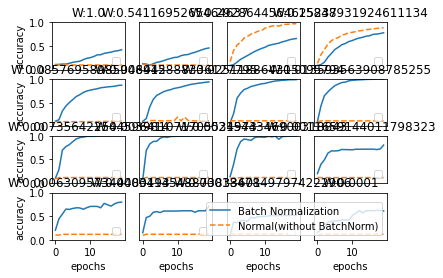

In [117]:
import sys, os
sys.path.append("../DLFS_book/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

## Overfitting

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

In [ ]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01) 

In [118]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [ ]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0: #check if one epoch has passed
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.522, test acc:0.5066
epoch:1, train acc:0.533, test acc:0.5142
epoch:2, train acc:0.539, test acc:0.5225
epoch:3, train acc:0.537, test acc:0.5211
epoch:4, train acc:0.545, test acc:0.5302
epoch:5, train acc:0.548, test acc:0.5353
epoch:6, train acc:0.559, test acc:0.5414
epoch:7, train acc:0.564, test acc:0.5475
epoch:8, train acc:0.572, test acc:0.5499
epoch:9, train acc:0.582, test acc:0.5588
epoch:10, train acc:0.584, test acc:0.5662
epoch:11, train acc:0.586, test acc:0.5681
epoch:12, train acc:0.595, test acc:0.5743
epoch:13, train acc:0.595, test acc:0.5752
epoch:14, train acc:0.6, test acc:0.5765
epoch:15, train acc:0.604, test acc:0.5828
epoch:16, train acc:0.605, test acc:0.5872
epoch:17, train acc:0.606, test acc:0.5859
epoch:18, train acc:0.608, test acc:0.5875
epoch:19, train acc:0.613, test acc:0.5935
epoch:20, train acc:0.622, test acc:0.5992
epoch:21, train acc:0.628, test acc:0.6018
epoch:22, train acc:0.634, test acc:0.6039
epoch:23, train acc:0.6

In [ ]:
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Weight Decay

In [ ]:
#overfitting has occurred
weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

In [ ]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## Dropout

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if(train_flg):
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x*self.mask
        return x*(1.0-self.dropout_ratio)
    def backward(self, dout):
        return dout*self.mask

In [ ]:
#using dropout
from common.trainer import Trainer #using trainer -> calles forward and backward!

use_dropout = True 
dropout_ratio = 0.2


network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list


In [ ]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## For the best Hyperparamiter

In [ ]:
from common.util import shuffle_dataset
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train, t_train = shuffle_dataset(x_train, t_train)
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [ ]:
import sys, os
sys.path.append("../DLFS_book/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [ ]:
def __train(lr, weight_decay, epocs=50): #get these as input
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [ ]:
# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial): #100번 시행!
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list # put accuracy in dictionary
    results_train[key] = train_acc_list

In [ ]:
# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20 #draw 20 of the best ones
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num)) #4
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()